In [ ]:
# libraries

import numpy as np
import random
import pandas as pd

import warnings

In [ ]:
# set warning off
warnings.filterwarnings("ignore")

In [ ]:
#read data
x=pd.read_csv('./model_data/features.csv')
y=pd.read_csv('./model_data/labels.csv')

### Check Balance of labels

In [ ]:
y['label'].value_counts()

This means data are highly imbalanced.

## Checking features and labels 

In [ ]:
x.shape , y.shape

This means features and labels are not properly ordered and require proper order.

### checking duplicated

In [ ]:
x.duplicated().sum()

In [ ]:
y_=y[y.duplicated(keep='last')==False]
y_.shape,y.shape

There are too many duplicates in features (i.e. x). But there are __no duplicates__ in labels

# Data cleaning:
- Remove duplicates
- Properly order features and labels using 'key'
- Balance the data by duplicating data 

### Remove duplicates
Keeping only first data point. 

In [ ]:
x_=x[x.duplicated(keep='last')==False]
x_.shape,x.shape

### Order data as per 'key' values
Using dictionary

In [ ]:
from collections import defaultdict
from tqdm import tqdm

In [ ]:
x_nokey=x_.loc[:,x_.columns != 'key']
x_key=x_['key']
x_dict = defaultdict()
for i in tqdm(range(len(x_))):
    k=x_key.iloc[i]
    v=x_nokey.iloc[i]
    x_dict[k]=list(v)

In [ ]:
len(x_dict.keys()),x_.shape

In [ ]:
data_dict = defaultdict()
for i in tqdm(range(len(y))):
    if y['key'][i] in x_dict:
        x_dict[y['key'][i]].append(y['label'][i])
        data_dict[y['key'][i]] = x_dict[y['key'][i]]

In [ ]:
data=pd.DataFrame.from_dict(data_dict, orient = 'index')

In [ ]:
data.shape

In [ ]:
data.head()

### Balance the data 

Now try to make data more balanced by duplicating the data. At least both label should be near equal. Lets make 0 label 7 times.

In [ ]:
data[76].value_counts()

In [ ]:
d_zeros = data[data[76]==0]
d_zeros.shape

In [ ]:
data_balanced = pd.concat([d_zeros,data,d_zeros,d_zeros,d_zeros,d_zeros,d_zeros,d_zeros,])

In [ ]:
data_balanced.shape

In [ ]:
data_balanced[76].value_counts()

#### To avoid biasnes due to grouping occured in cocatenation operation, shuffle the rows.

In [ ]:
data_balanced = data_balanced.sample(frac=1)

In [ ]:
data_balanced.shape

## save clean and balanced data

In [ ]:
x_clean = data_balanced.iloc[:,0:76]
y_clean = data_balanced.iloc[:,76]

In [ ]:
x_clean.shape , y_clean.shape

In [ ]:
x_clean.to_csv(r'./model_data/features_clean.csv', index = False, header = True)
y_clean.to_csv(r'./model_data/labels_clean.csv', index = False, header = True)

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
corr = x_clean.corr()


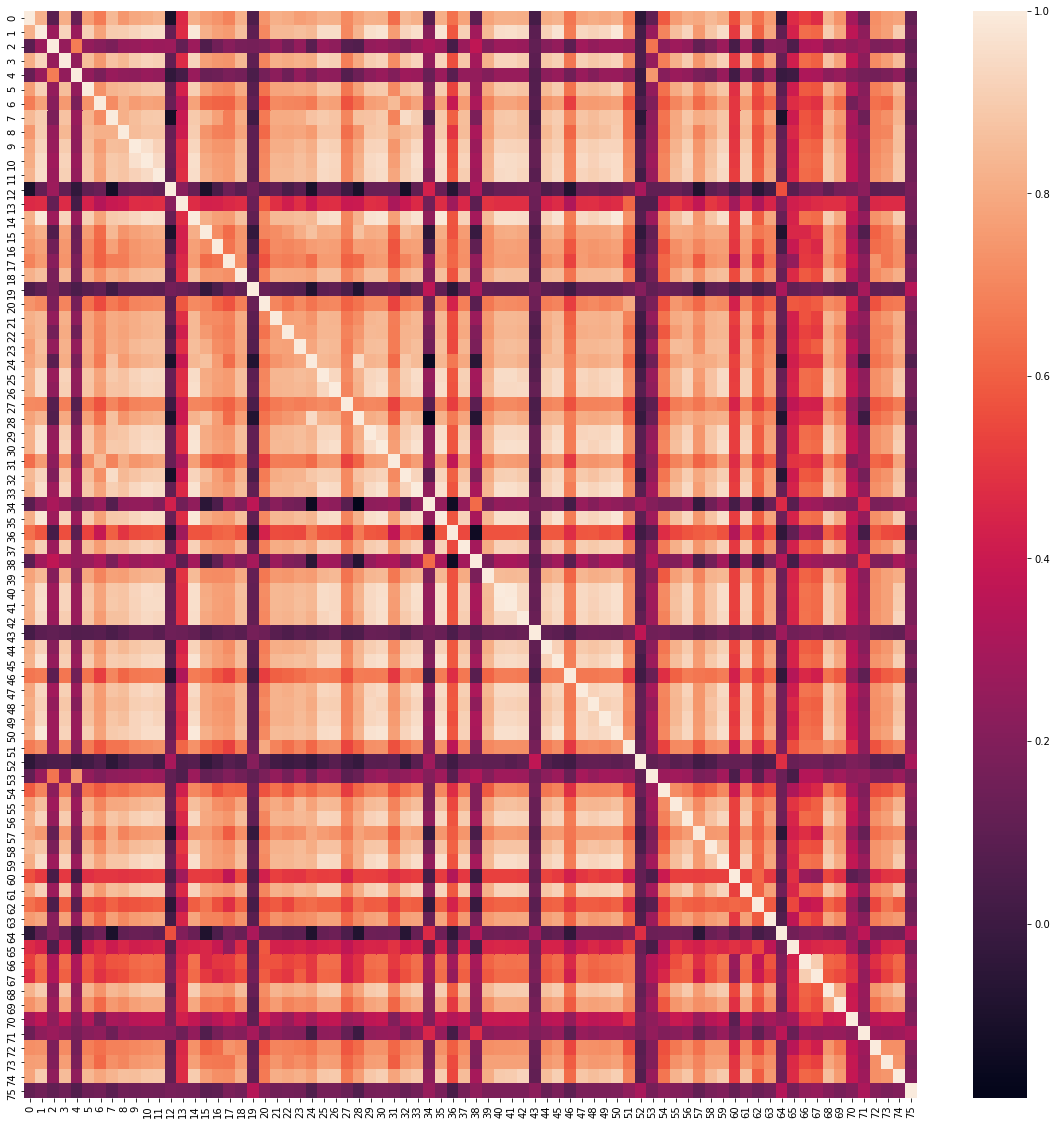

In [41]:
fig, ax = plt.subplots(figsize=(20,20))    
ax = sns.heatmap(corr)

In [42]:
keep_col = [0,1,2,4,6,12,13,19,27,31,34,36,38,46,51,52,53,54,57,60,62,64,65,66,67,70,71,75]

In [45]:
x_clean_small=x_clean[keep_col]

<AxesSubplot:>

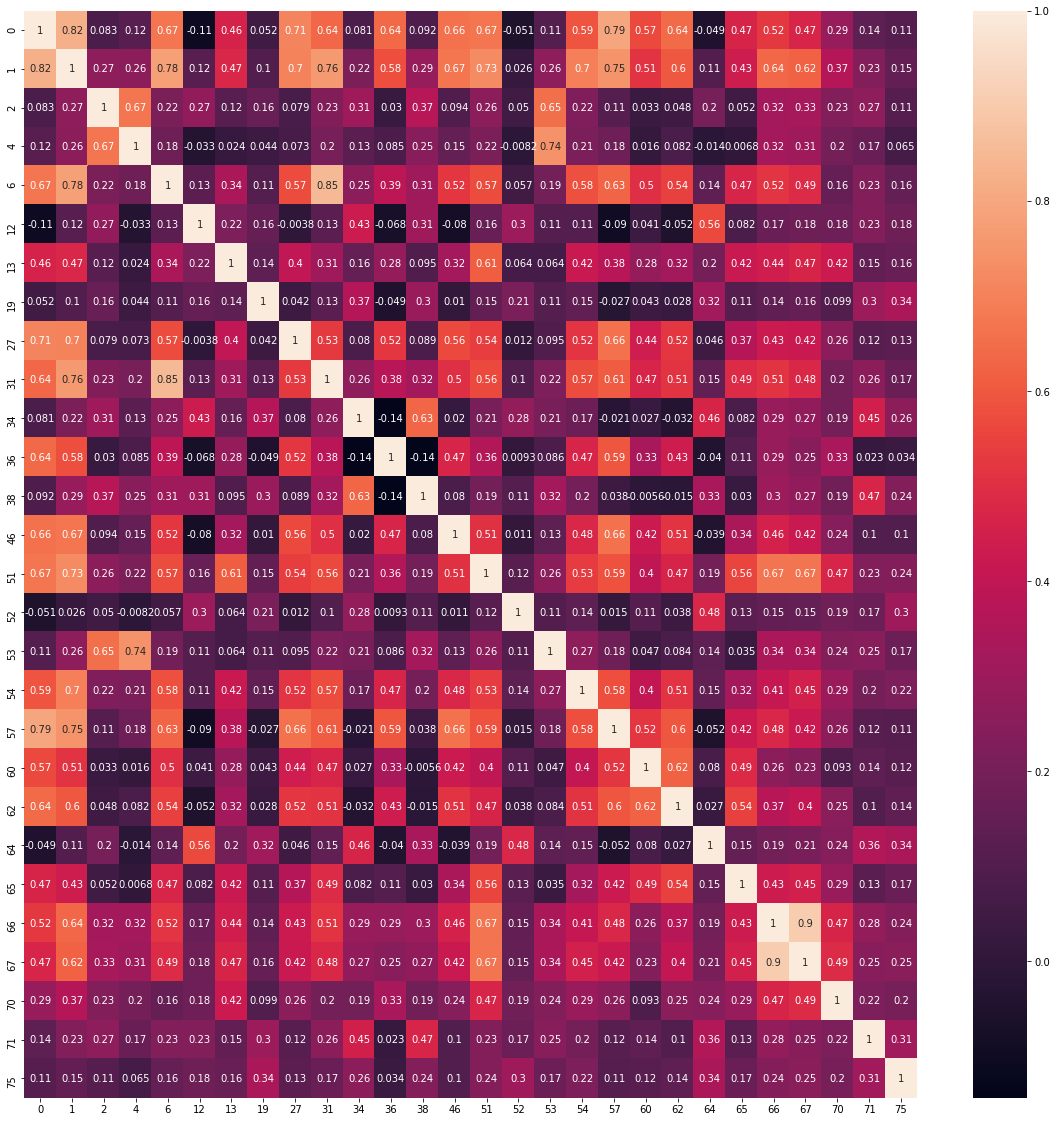

In [49]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(x_clean_small.corr(),annot=True)

In [55]:
x_clean_small.to_csv(r'./model_data/sel_features_clean.csv', index = False, header = False)

In [54]:
x_clean_small.shape ,x_clean.shape

((1084626, 28), (1084626, 76))

In [53]:
y_clean.shape

(1084626, 1)